# Chapter 4: Dimensionality Reduction

Regression: Linear Regression | Logistic Regression
Bayerian: Naive Bayes (Gaussian, Bernoulli & Multinomial)
Dimention Reduction: Principal COmponent Analysis (PCA)
Instanced Based: K-Nearest Neighbors | K-NN
Clusering: K-Means Clustering | Hierarchical Clustering | Density-Based Spatial Clustering of Application with noise

* Features are variables, columns, attribute and field
* Instance: Observation or example
* Target: Dependent Variable
* Data: Predictor variable

1) Factor Analysis: Sklearn
Latent variable from Iris dataset
    

In [19]:
import numpy as np
import pandas as pd

import sklearn
from sklearn.decomposition import FactorAnalysis
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import decomposition

import matplotlib.pyplot as plt
import seaborn as sb
import pylab as plt

from IPython.display import Image
from IPython.core.display import HTML
from pylab import rcParams



In [20]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

In [4]:
iris = datasets.load_iris()
X = iris.data
variable_names = iris.feature_names

In [9]:
factor = FactorAnalysis().fit(X)

In [11]:
pd.DataFrame(factor.components_, columns=variable_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.707227,-0.153147,1.653151,0.701569
1,0.114676,0.159763,-0.045604,-0.014052
2,-0.000000,0.000000,0.000000,0.000000
3,-0.000000,0.000000,0.000000,-0.000000


# Principal Component Analysis

Singular Value Decomposition (SVD)

In [21]:
iris = datasets.load_iris()
X = iris.data
variable_names = iris.feature_names
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [23]:
pca = decomposition.PCA()
iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [24]:
pca.explained_variance_ratio_.sum()

1.0

In [28]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361590,-0.082269,0.856572,0.358844
1,0.656540,0.729712,-0.175767,-0.074706
2,-0.580997,0.596418,0.072524,0.549061
3,0.317255,-0.324094,-0.479719,0.751121


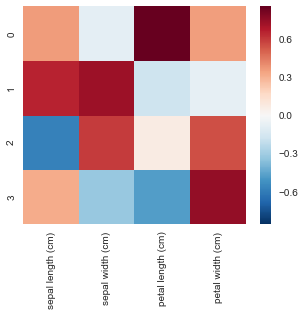

In [29]:
sb.heatmap(comps)

# Chapter 5: Outlier Analysis

 Outlier detection is useful for preprocessing tasks for analysis or machine learning. Tukey Boxplot: InterQuartile Range (IQR)

In [51]:
df = pd.read_csv('../Datasets/iris_data.csv', header=None, sep=',')
df.columns = ['Sepal Length','Sepal Width','Petal Length','Petal width','Species']
x = df.iloc[:,0:4]
y = df.iloc[:,4].values

df[:5]

,Sepal Length,Sepal Width,Petal Length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


**Identify utliers from Tukey boxplots**

[]

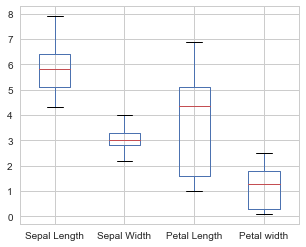

In [43]:
df.boxplot(return_type='dict')
plt.plot()

In [53]:
Sepal_width = x.iloc[:,1]
iris_outliers = (Sepal_width>4)
df[iris_outliers]





,Sepal Length,Sepal Width,Petal Length,Petal width,Species
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa


**Applying Tukey outlier labeling**

In [58]:
pd.options.display.float_format = '{:.1f}'.format

In [59]:
X_df = pd.DataFrame(x)
print(X_df.describe())

       Sepal Length  Sepal Width  Petal Length  Petal width
count         150.0        150.0         150.0        150.0
mean            5.8          3.1           3.8          1.2
std             0.8          0.4           1.8          0.8
min             4.3          2.0           1.0          0.1
25%             5.1          2.8           1.6          0.3
50%             5.8          3.0           4.3          1.3
75%             6.4          3.3           5.1          1.8
max             7.9          4.4           6.9          2.5


## Segment 2 - Multivariate Outlier Detection

** Visually inspecting boxplot **

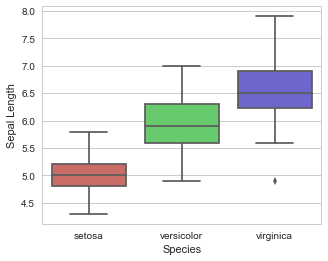

In [61]:
sb.boxplot(x='Species', y='Sepal Length', data=df, palette='hls')

** Looking at the scatterplot matrix **

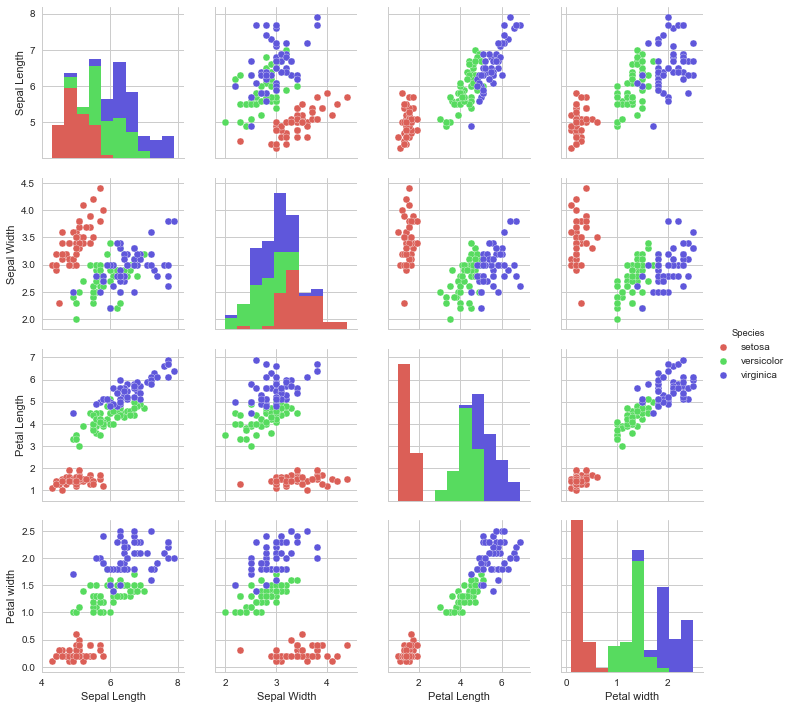

In [64]:
sb.pairplot(df, hue='Species', palette='hls')

## Segment 3 - DBSCAN 

In [65]:
from sklearn.cluster import DBSCAN
from collections import Counter

**Train your model**

In [70]:
df = pd.read_csv('../Datasets/iris_data.csv', header=None, sep=',')
df.columns = ['Sepal Length','Sepal Width','Petal Length','Petal width','Species']
x = df.iloc[:,0:4].values
y = df.iloc[:,4].values

df[:5]

model = DBSCAN(eps=0.1, min_samples=19).fit(x)
print(model)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    min_samples=19, n_jobs=1, p=None)


In [77]:
outliers_df = pd.DataFrame(x)
print(Counter(model.labels_))

print(outliers_df[model.labels_ == -1])


Counter({-1: 150})
      0   1   2   3
0   5.1 3.5 1.4 0.2
1   4.9 3.0 1.4 0.2
2   4.7 3.2 1.3 0.2
3   4.6 3.1 1.5 0.2
4   5.0 3.6 1.4 0.2
5   5.4 3.9 1.7 0.4
6   4.6 3.4 1.4 0.3
7   5.0 3.4 1.5 0.2
8   4.4 2.9 1.4 0.2
9   4.9 3.1 1.5 0.1
10  5.4 3.7 1.5 0.2
11  4.8 3.4 1.6 0.2
12  4.8 3.0 1.4 0.1
13  4.3 3.0 1.1 0.1
14  5.8 4.0 1.2 0.2
15  5.7 4.4 1.5 0.4
16  5.4 3.9 1.3 0.4
17  5.1 3.5 1.4 0.3
18  5.7 3.8 1.7 0.3
19  5.1 3.8 1.5 0.3
20  5.4 3.4 1.7 0.2
21  5.1 3.7 1.5 0.4
22  4.6 3.6 1.0 0.2
23  5.1 3.3 1.7 0.5
24  4.8 3.4 1.9 0.2
25  5.0 3.0 1.6 0.2
26  5.0 3.4 1.6 0.4
27  5.2 3.5 1.5 0.2
28  5.2 3.4 1.4 0.2
29  4.7 3.2 1.6 0.2
..   ..  ..  ..  ..
120 6.9 3.2 5.7 2.3
121 5.6 2.8 4.9 2.0
122 7.7 2.8 6.7 2.0
123 6.3 2.7 4.9 1.8
124 6.7 3.3 5.7 2.1
125 7.2 3.2 6.0 1.8
126 6.2 2.8 4.8 1.8
127 6.1 3.0 4.9 1.8
128 6.4 2.8 5.6 2.1
129 7.2 3.0 5.8 1.6
130 7.4 2.8 6.1 1.9
131 7.9 3.8 6.4 2.0
132 6.4 2.8 5.6 2.2
133 6.3 2.8 5.1 1.5
134 6.1 2.6 5.6 1.4
135 7.7 3.0 6.1 2.3
136 6.3 3.4 5.6 2.4
1

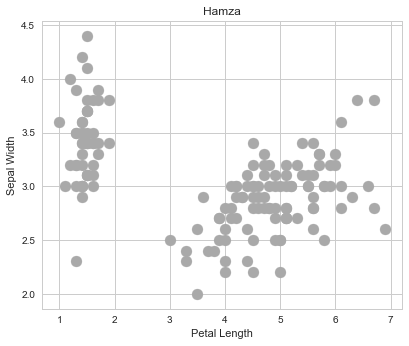

In [84]:

fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])
colors = model.labels_

ax.scatter(x[:,2], x[:,1], c=['darkgray'], s=120)
ax.set_xlabel('Petal Length')
ax.set_ylabel('Sepal Width')
plt.title('Hamza')
